# Wissenschaftliches Rechnen und plotten

Oftmals können wir uns einen guten Überblick über das Verhalten einer Funktion verschaffen, indem wir sie schnell plotten. Auch das Konvergenzverhalten von Reihen und Mengen im $\mathbb R^2$ werden durch Visualisierungen viel greifbarer. Wir wollen in diesem Notebook einige Möglichkeiten der Visualisierung betrachten. Nebenbei behandeln wir das effiziente Auswerten von Funktionen und das Rechnen mit komplexen Zahlen in python.

<center>
<a href="https://youtu.be/mrPofO-iFw0" target="_blank">
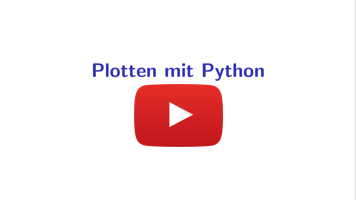
</a>
</center>

Die Bibliothek <code>matplotlib</code> stellt eine Vielfalt von Methoden zum plotten zur Verfügung. Die Dokumentation ist [hier](https://matplotlib.org/stable/users/index). <code>matplotlib</code> ist recht mächtig, aber leider auch ein wenig sperrig zu bedienen. Das fängt bereits mit dem <code>import</code> an. Zum Laden müssen wir folgenden Befehl ausführen:

In [ ]:
import matplotlib.pyplot

Da das sehr lang ist, führen wir einen *alias* ein, einen alternativen Namen, den wir anstelle von <code>matplotlib.pyplot</code> verwenden können. Dies geschieht mit dem Befehl <code>as</code>. 

In [ ]:
import matplotlib.pyplot as plt  ### plt ist die gebräuchliche Abkürzung

Welchem Zweck dient das? Wann immer wir nun einen Befehl aus der <code>matplotlib</code>-Bibliothek brauchen, etwa den <code>plot</code>-Befehl, können wir die Abkürzung nutzen: <code>plt.plot</code>. Mehr dazu unten.

Wo wir dabei sind, machen wir gleich noch einen <code>import</code>, nämlich von <code>numpy</code> -- das ist die Grundlage für jedes wissenschaftliche Rechnen. Insbesondere stellt <code>numpy</code> eine *array*-Klasse bereit. Die funktioniert ähnlich wie die python-eigenen Listen, ist aber hoch-optimiert. 

In [ ]:
import numpy as np ### np ist die gebräuchliche Abkürzung
import math # brauchen wir für pi, e usw

## Ein erster Funktionsplot

Wie in praktischen allen Softwaresystemen, die in der Mathematik eingesetzt werden, können wir einfache Funktionen plotten. Als Beispiel schauen wir uns
$$f(x)=e^{-\frac{x^2}{2}}$$
an. 

Als erstes erzeugen wir mit <code>np.linspace(a,b,n)</code> eine Liste (genauer: ein *array*) von $n$ äquidistanten Punkten aus dem Intervall $[a,b]$. Zur Illustration:

In [ ]:
xx=np.linspace(0,1,11)
xx

Warum <code>xx</code>? Ich will damit andeuten, dass es sich nicht um eine einzige Zahl handelt. Ist das die beste Notation? Keine Ahnung. 

Wenn Sie noch einmal auf die letzte Ausgabe schauen: Da steht das Stichwort <code>array</code>. Wir verifizieren:

In [ ]:
type(xx)

Wir sehen: es handelt sich um eine *array*-Klasse aus dem <code>numpy</code>-Paket. Das ist wichtig, weil wir damit weitere Funktionalität geschenkt bekommen. Sehen wir gleich unten. 

Wir wollen die Funktion $f$ an 500 Stellen auswerten. Dafür erzeugen wir 500 Stützstellen zwischen -4 und 4, die wir in <code>xx</code> speichern.

In [ ]:
xx=np.linspace(-4,4,500)

Wir berechnen wir nun die Funktionswerte? Wir schreiben die Funktiongleichung hin:

In [ ]:
yy=math.e**(-xx**2/2)

Wie Sie sehen, schreiben wir einfach die Funktionsgleichung hin und, quasi magisch, wird dies auf jedes $x$ in <code>xx</code> angewandt! Achtung -- diese Magie kommt von <code>numpy</code>, dh, dass dies geht, liegt daran, dass <code>xx</code> ein <code>numpy</code>-array ist. 
Mit einer python-Liste geht das nicht. 

In [ ]:
X=[0,0.1,0.2,0.3,0.4] # python-Liste -- kein numpy-array
# der folgende Code verursacht einen Fehler
# Y=math.e**(-X**2/2)

Kommen wir zum plot. Wenn Sie es eilig haben, können Sie einfach <code>plt.plot(xx,yy)</code> schreiben. (Das sieht dann fast so aus wie in Matlab.)

Ich will's aber ein wenig komplizierter halten, da es dann später einfacher wird, sehr komplizierte plots zu programmieren.

In [ ]:
fig,ax=plt.subplots(figsize=(5,3))  # Achtung, python, hier kommt ein plot -- der Größe (Breite,Höhe)==(5,3)
ax.plot(xx,yy) # der eigentliche plot-Befehl

In der ersten Zeile <code>fig,ax=plt.subplots(figsize=(5,3))</code> wird ein Objekt <code>fig</code> und ein Objekt <code>ax</code> zurück gegeben. <code>fig</code> (wie *figure*) repräsentiert den gesamten plot, der aus diversen Unterplots bestehen könnte (hier nicht der Fall). Das <code>fig</code>-Objekt werden Sie selten brauchen. Das Objekt <code>ax</code> (wie *axis*) repräsentiert den eigentlichen plot, daher verwenden wir es, um die Funktion zu zeichnen. 

So, vielleicht sind Sie nicht mit der Farbe der Kurve einverstanden und die Dicke der Kurve gefällt Ihnen auch nicht. Kann man alles einstellen.

In [ ]:
fig,ax=plt.subplots(figsize=(5,3))  
ax.plot(xx,yy,color="red",linewidth=5) 

Weitere Einstellmöglichkeiten gibt's [hier.](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

## Harmonische Reihe

Die harmonische Reihe 
$$
\sum_{k=1}^\infty \frac{1}{k}
$$
ist so harmonisch, dass sie divergiert, dh, dass der Reihenwert $\infty$ wird. Und genauer kann man sich überlegen, dass die Partialsummen, die *harmonischen Zahlen*
$$
H_n=\sum_{k=1}^n\frac{1}{k}
$$
in etwa wie der Logarithmus wachsen
$$
H_n \approx \ln(n)
$$
Überprüfen wir das numerisch! Dazu plotten wir $\mathbb N\to\mathbb R$, $n\mapsto H_n$. Da der Wertebereich hier nur ganze Zahlen zulässt, ist die Funktion <code>np.linspace</code> nicht die richtige. Stattdessen nehmen wir <code>np.arange</code> -- das ist das <code>numpy</code>-Pendant zu <code>range</code>.

In [ ]:
np.arange(7,12)

So, wir berechnen die ersten 99 harmonischen Zahlen. Dh, als Stützwerte definieren wir:

In [ ]:
nn=np.arange(1,100)

Als nächstes beschaffen wir uns eine Liste mit den ganzen Kehrwerten
$$
\frac{1}{1},\frac{1}{2},\frac{1}{3},\frac{1}{4},\ldots
$$
Das geht einfach mit <code>1/nn</code>. Wir demonstrieren hier gleich, dass sich <code>numpy</code>-arrays so ähnlich wie Listen verhalten: Mit dem *slice*-Operator <code>[:10]</code> können wir uns die ersten 10 Elemente anzeigen lassen:

In [ ]:
1/nn[:10]

So <code>1/nn</code> gibt uns eine Liste mit allen Werten $\frac{1}{k}$. Wir brauchen aber die Teilsummen $\sum_{k=1}^n\frac{1}{n}$. Auch hier gibt's einen praktischen Befehl: <code>np.cumsum</code>. Der Befehl berechnet die *kumulative* Summe eines *arrays*. 

Also:

In [ ]:
L=np.arange(10) # startet mit 0
L,np.cumsum(L)

Plotten wir. Da wir die harmonischen Zahlen nur für natürliche Zahlen definiert sind, ist die Darstellung mit einer durchgezogenen Linie irreführend. Daher plotten wir einen Kreis für jede harmonische Zahl, und zwar, durch den zusätzlichen Parameter <code>'o'</code>. [Hier](https://matplotlib.org/stable/api/markers_api.html) ist eine Liste von Alternativen zu <code>'o'</code>, die zu anderen Plotsymbolen führen. <code>'x'</code> zB führt zum Plot von Kreuzen.

In [ ]:
nn=np.arange(1,100)
Hn=np.cumsum(1/nn) # die harmonischen Zahlen

fig,ax=plt.subplots(figsize=(5,3))
ax.plot(nn,Hn,'o')
ax.set_xlabel("n") # label an der x-Achse
ax.set_ylabel("H_n") # label an der y-Achse

Zwei Verbesserungen: 
* Weil die Kreise bei höherem $n$ so dicht sitzen, gehen die in einander über. Um die einzelnen Kreise besser zu sehen, machen wir sie durch Angabe von <code>alpha=0.8</code> ein wenig transparent.
* Zum Vergleich plotten wir auch die Funktion $\ln(n)$. 

In [ ]:
fig,ax=plt.subplots(figsize=(5,3))
ax.plot(nn,Hn,'o',alpha=0.5)
ax.set_xlabel("n") # label an der x-Achse
ax.set_ylabel("H_n") # label an der y-Achse

ax.plot(nn,np.log(nn))

Hmmm, so ganz passt $\ln(n)$ nicht. [Wikipedia](https://de.wikipedia.org/wiki/Euler-Mascheroni-Konstante) klärt auf: Es gilt viel mehr
$$
H_n\approx \ln(n)+\gamma,
$$
wobei $\gamma\approx 0.5722$ die *Euler-Mascheroni-Konstante* ist. Wir versuchen's noch einmal mit dem plot. Diesmal plotten wir $\ln(n)+\gamma$ auch transparent und dicker. Zusätzlich lassen wir eine Legende anzeigen.

In [ ]:
fig,ax=plt.subplots(figsize=(5,3))
ax.plot(nn,Hn,'o',alpha=0.5,label="H_n") # label -> Legende
ax.set_xlabel("n") # label an der x-Achse
ax.set_ylabel("H_n") # label an der y-Achse

ax.plot(nn,np.log(nn)+0.5722,alpha=0.7,linewidth=2,label="ln+gamma",color='black')
ax.legend() # Legende anschalten

Wunderbarer fit! 

### Aufgabe: Leibniz-Reihe
Approximieren Sie die [Leibniz-Reihe](https://de.wikipedia.org/wiki/Leibniz-Reihe) 
$$
\sum_{n=0}^\infty\frac{(-1)^n}{2n+1}=\frac{\pi}{4}
$$
Berechnen Sie dazu, analog wie zur harmonische Reihe oben, die ersten 100 Partialsummen 
$$
S_N=\sum_{n=0}^N\frac{(-1)^n}{2n+1},\quad N=0,1,\ldots
$$
und plotten Sie die Paare $(N,S_N)$. Den Wert der Reihe können Sie mit <code>ax.axhline(math.pi/4,color="red")</code> ebenfalls im Plot unterbringen. 

In [ ]:
### BEGIN SOLUTION
# Ihre Lösung hier
### END SOLUTION

## Primzahlen zählen

Wie viele Primzahlen unter 100 gibt es? Wie viele Primzahlen unter 1000? Wir definieren dazu die *Primzahlfunktion*
$$
\pi(n) = |\{p:p\leq n,\, p\text{ Primzahl}\}|
$$

Wie stark wächst $\pi(n)$? Finden wir es heraus! In einem vorherigen Notebook hatten wir bereits alle Primzahlen bis zu einer bestimmten Größe bestimmt. Wir kopieren und adaptieren den Code. Es stellt sich heraus, dass es hier nützlicher ist, eine Liste <code>[True,True,False...]</code> zu berechnen, die angibt, ob die Zahlen $2,3,4,...$ Primzahl sind, ja oder nein.

In [ ]:
def get_primes(n):
    """
    erzeugt Liste L mit Einträgen, die mit 2,3,...,n-1 korrespondieren
    der Eintrag L[i+2] gibt an, ob i Primzahl ist (wahr/falsch)
    n: positive ganze Zahl
    """
    candidates=[True]*n  # erzeugt Liste [True, True, ..., True] der Länge n
    for i in range(2,n):
        if candidates[i]:
            for j in range(2*i,n,i): # kein Vielfaches von i ist prim 
                candidates[j]=False # markiere als "nicht-prim"
    return candidates[2:] # wir schmeissen die ersten beiden Einträge weg, da diese zu n=0 und n=1 gehören

prime_yes_no=get_primes(100000)
prime_yes_no[:10]

Wir sehen: 2 ist prim, 3 ist prim, 4 nicht, 5 ist prim, 6 nicht, 7 ist prim, 8 nicht, 9 nicht usw.

Was brauchen wir, um Primzahlen zu zählen? Wir müssen die Anzahl der Werte <code>True</code> in <code>prime_yes_no</code> zählen. Glücklicherweise behandelt python <code>True</code> wie eine 1 und <code>False</code> wie 0.

In [ ]:
True+True+False

Das bedeutet, dass wir wieder die kumulative Summe, also <code>np.cumsum</code> benutzen können. 

In [ ]:
np.cumsum(prime_yes_no)[:20] # [:20] -> wir zeigen uns nur die ersten 20 Terme an

Plotten wir.

In [ ]:
fig,ax=plt.subplots(figsize=(5,3))
pi=np.cumsum(prime_yes_no)
N=np.arange(2,len(pi)+2)
ax.plot(N,pi)
ax.set_xlabel("n")
ax.set_ylabel("pi(n)")

Die Funktion $\pi(n)$ sieht erstaunlich linear aus. Wir vergleichen einmal mit einer linearen Funktion: Augenscheinlich, ist $n\mapsto n/10$ ein guter fit. Probieren wir einmal.

In [ ]:
fig,ax=plt.subplots(figsize=(6,4))
pi=np.cumsum(prime_yes_no)
N=np.arange(2,len(pi)+2)
ax.plot(N,pi,label="pi",alpha=0.8,linewidth=2)
ax.set_xlabel("n")
ax.set_ylabel("pi(n)")

ax.plot(N,N/10,label="fit-Funktion",alpha=0.8,linewidth=2)
ax.legend()

Passt nicht ganz. Die Funktion $\pi$ weist doch eine leichte Krümmung auf. Es wird Zeit, Nachforschungen anzustellen: Laut [Wikipedia](https://en.wikipedia.org/wiki/Prime_number_theorem) wächst $\pi(n)$ in etwa wie $\frac{n}{\ln(n)}$. Eine noch bessere Approximation ist
$$
\pi(n)\approx \frac{n}{\ln(n)}\left(1+\frac{1}{\ln(n)}\right)
$$
Probieren wir aus!

In [ ]:
fig,ax=plt.subplots(figsize=(6,4))
pi=np.cumsum(prime_yes_no)
N=np.arange(2,len(pi)+2)
ax.plot(N,pi,label="pi",alpha=0.8,linewidth=2)
ax.set_xlabel("n")
ax.set_ylabel("pi(n)")

ax.plot(N,N/np.log(N)*(1+1/np.log(N)),label="fit-Funktion",alpha=0.8,linewidth=2)
ax.legend()

Sieht überzeugend aus!

## Weierstrass-Funktion

Die Analysis kennt eine Reihe von Funktionen mit extremen Eigenschaften. Eine prominente ist die *Weierstrass-Funktion*, eine Funktion, die stetig aber nirgends differenzierbar ist. Sie ist auf ganz $\mathbb R$ wie folgt definiert:

$$f(x)=\sum_{n=0}^\infty a^n \cos(b^n\pi x)$$

for $0<a<1$ and $ab>1+\tfrac{3}{2}\pi$.

Aufgrund der unendlichen Summe können wir dieses Funktion natürlich nicht exakt berechnen. Wir können sie aber approximieren, in dem wir ein (großes) $N\in\mathbb N$ wählen und 
$$f_N(x)=\sum_{n=0}^N a^n \cos(b^n\pi x)$$
betrachten. Plotten wir also $f_N$. 

Wir berechnen $f_N$ für eine Reihe $x_1,x_2,\ldots,x_K$ von Stützstelle und das ganze in zwei Schritte:
* Wir bestimmen $g_{n,k}=a^n\cos(b^n\pi x_k)$ für alle $n=1,\ldots, N$ und $k=1,\ldots K$
* Dann summieren wir $f_N(x_k)=\sum_{n=1}^N g_{n,k}$.

Um $g_{n,k}$ zu berechnen, erstellen wir zwei 2-dimensionale arrays der Dimension $K\times N$:
$$
\mathcal N=\begin{pmatrix}1 & 2 & \ldots & N\\ 1 & 2 & \ldots & N\\ & \vdots& &\\1 & 2 & \ldots & N\\\end{pmatrix}
\quad\text{und}\quad
\mathcal X=\begin{pmatrix}x_1 & x_1 & \ldots & x_1\\x_2 & x_2 & \ldots & x_2\\ & \vdots& &\\ x_K & x_K & \ldots & x_K\\\end{pmatrix}
$$
Warum? Weil dann alle Informationen, die wir brauchen, um $g_{n,k}$ berechnen in den Elementen $\mathcal N_{n,k}$ und $\mathcal X_{n,k}$ stecken. Aber gucken wir zunächst genau, was die Funktion <code>np.meshgrid</code> macht.

In [ ]:
N,X=np.meshgrid([1,2,3],[10,20,30,40])
N,X=np.meshgrid([1,2,3],[0.2,0.3,0.4,0.5])
print(N)
print()
print(X)

Viele Funktionen von <code>numpy</code> lassen sich nahtlos und genau wie im 1-dimensionalen Fall auf 2- und mehr-dimensionale arrays anwenden. ZB:

In [ ]:
np.cos(N)

Addition und Multiplikation zweier 2-dimensionaler arrays ist komponentenweise:

In [ ]:
N+X,N*X

Insbesondere können wir die $g_{n,k}$ so bestimmen:

In [ ]:
a=0.5
b=12
a**N*np.cos(b**N*math.pi*X)

Als letztes die Summe über jede Zeile. Die Funktion <code>np.sum</code> summiert alle Elemente eines arrays. Wenn wir nur über eine Achse summieren wollen, dann geben wir den Parameter <code>axis=1</code> an. Hier ist ein Beispiel.

In [ ]:
NN=np.arange(12).reshape(3,4) # reshape macht aus dem 1-dim array ein array mit Dimensionen 3x4
NN

In [ ]:
np.sum(NN,axis=1),np.sum(NN,axis=0),np.sum(NN)

So, nun endlich die Weierstrass-Funktion.

In [ ]:
def weierstrass(xx,sumlength=100,a=0.5,b=12):
    nn=np.arange(sumlength)
    N,X=np.meshgrid(nn,xx)
    return np.sum(a**N*np.cos(b**N*math.pi*X),axis=1)

Plotten ist jetzt einfach:

In [ ]:
xx=np.linspace(0,4,1000)
yy=weierstrass(xx)

fig,ax=plt.subplots(figsize=(7,3))
ax.plot(xx,yy)

Die Funktion ist zitterig, aber es ist noch nicht klar, warum sie nirgends differenzierbar ist. Zoomen wir mal weiter rein. Wir nutzen die Gelegenheit, um ein weiteres feature von <code>matplotlib</code> zu demonstrieren: Man kann Plots nebeneinander (und genauer in einem Raster) anordnen. Dazu nutzen wir <code>plt.subplots(rows,cols)</code>, um uns ein Raster von Plots mit <code>rows</code> vielen Zeilen und <code>cols</code> vielen Spalten zu holen. Als Rückgabe erhalten wir <code>fig,axs</code> ein Objekt für die ganze Abbildung (wie gesagt: brauchen wir sehr selten) und nun ein numpy-array für die Plots.

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(10,3))

xx=np.linspace(0.1,0.2,1000)
yy=weierstrass(xx)
axs[0].plot(xx,yy)

xx=np.linspace(0.11,0.12,1000)
yy=weierstrass(xx)
axs[1].plot(xx,yy)

Was sehen wir: Auf jeder Zoom-Stufe bleibt die Funktion extrem zitterig.

### Aufgabe: Van der Waerden-Funktion

Die Van der Waerden-Funktion ist ein weiteres Beispiel für eine Funktion, die überall stetig aber nirgends differenzierbar ist. 
Sie ist auf ganz $\mathbb R$ durch
$$
f(x)=\sum_{n=0}^\infty\frac{|\text{round}(10^nx)-10^nx|}{10^n}
$$
definiert. Plotten Sie die Funktion im Intervall $[0,1]$. Für die Approximation reichen 10 Summenglieder. Für die Umsetzung werden Sie die numpy-Funktionen <code>np.abs</code> und <code>np.round</code> brauchen.

In [ ]:
### BEGIN SOLUTION
# Ihre Lösung hier
### END SOLUTION

## Kurven

Bisher haben wir Funktionen $f:x\mapsto f(x)$ geplottet. Die Funktion <code>ax.plot</code> ist aber viel flexibler und und in der Lage 2-dimensionale Kurven $\mathbb R\to\mathbb R^2$ darzustellen. In dem folgenden Beispiel nutze ich gleich die Gelegenheit, um ebenfalls zu demonstrieren, wie der angezeigte $x$- und $y$-Bereich eingestellt werden kann.

Wir plotten die Kurve
$$
t\mapsto \begin{pmatrix} t^3-2t+1\\t^2+t\end{pmatrix}
$$

In [ ]:
tt=np.linspace(-2,2,500)
xx=tt**3-2*tt+1
yy=tt**2+tt

fig,ax=plt.subplots(figsize=(4,4))
ax.plot(xx,yy)
ax.set_xlim(-2,3) # setze x-Bereich auf [-2,3]
ax.set_ylim(-1,4) # setze y-Bereich auf [-1,4]

Kurven im 2- oder 3-dimensionalen Raum lassen sich leicht als Trajektorien von physikalischen Objekten interpretieren. Wie können wir die, sich ändernde, Geschwindigkeit des Objekts visualisieren? Indem wir in regelmäßigen Zeitschritten vermerken, wo sich das Objekt befindet. 

Um das darzustellen, ein schneller Exkurs zur slice-Notation. Wir wissen bereits, dass <code>some_list[a:b]</code> die Teilliste von <code>some_list</code> mit den Indizes $a,a+1,...,b-1$ zurück liefert. Der Code <code>some_list[:]</code>, bei dem die Grenzen $a,b$ weggelassen wurden, liefert die ganze Liste (tatsächlich eine Kopie), da für die weggelassenen Grenzen einfach Anfang und Ende der Liste genommen werden. So, wir können nun durch einen weiteren Doppelpunkt <code>some_list[a:b:s]</code> eine Schrittweite angeben: dh, wir erhalten dann eine Teilliste mit Indizes zwischen $a$ und $b-1$, allerdings mit nur jedem $s$. Element. Dh insbesondere, dass <code>some_list[::2]</code> eine Liste mit jedem zweiten Element ergibt.

In [ ]:
L=['a','b','c','d','e','f','g']
L[::2]

In [ ]:
tt=np.linspace(-2,2,500)
xx=tt**3-2*tt+1
yy=tt**2+tt

fig,ax=plt.subplots(figsize=(4,4))
ax.plot(xx,yy)
ax.set_xlim(-2,3) # setze x-Bereich auf [-2,3]
ax.set_ylim(-1,4) # setze y-Bereich auf [-1,4]

ax.plot(xx[::20],yy[::20],'o',alpha=0.5,color='blue') ## wir plotten nur jeden 20. Wert, der Parameter 'o' setzt Kreise

Wir sehen, wenig überraschend, dass die Geschwindigkeit in der scharfen Kurve in der Nähe von $(2,0)$ sehr klein wird.

### Aufgabe: Kurve
Plotten Sie die Kurve
$$
[0,2\pi]\to\mathbb R^2,\quad t\mapsto\begin{pmatrix}16\sin(t)^3\\13\cos(t)-5\cos(2t)-2\cos(3t)-\cos(4t)\end{pmatrix}
$$
Sie werden die Funktionen <code>np.sin</code> und <code>np.cos</code> brauchen.

In [ ]:
### BEGIN SOLUTION
# Ihre Lösung hier
### END SOLUTION

## Sierpińsky-Teppich
<code>matplotlib</code> erlaubt es nicht nur Funktionen und Kurven zu plotten, sondern Daten aller Art. Insbesondere lassen sich Bilder und, für uns hier interessanter, Matrizen bzw arrays visualisieren. Eine Liste von verschiedenen Typen von plots findet sich [hier](https://matplotlib.org/stable/plot_types/index.html). 

Als Beispiel nehmen wir den [Sierpińsky-Teppich.](https://de.wikipedia.org/wiki/Sierpinski-Teppich) 
Wie entsteht der? Man startet mit der Menge $[0,1]\times [0,1]$, teilt diese in 9 (bis auf an den Rändern) disjunkte Quadrate mit jeweils 
einem Drittel der Seitenlänge auf, löscht das mittlere Quadrat und iteriert mit den 8 anderen Quadraten. Hier sind die ersten zwei Schritte.

<center>
    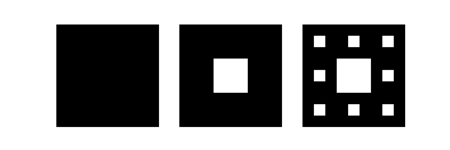
</center>

Warum ist der Sierpińsky-Teppich interessant? Es ist ein Beispiel für eine Menge mit Fläche 0 und einer (Hausforff-)Dimension zwischen 1 und 2, dh, es handelt sich nicht um ein 1-dimensionales Objekt, ganz 2-dimensional ist der Teppich aber auch nicht.

Bevor wir mit dem Teppich anfangen können, müssen wir uns kurz darüber unterhalten wie man an die Elemente in mehrdimensionalen numpy-arrays kommt. Dazu beschaffen wir uns Testobjekt, ein 4x3 numpy-array fortlaufend gefüllt mit den Zahlen $0,...,11$. Dies bekommen wir so: Wir definieren mit <code>np.arange(12)</code> einen 1-dimensionalen numpy-array mit den Zahlen $0,...,11$ und nutzen dann <code>reshape</code>, um den Inhalt in die Form 4x3 zu bringen. 

In [ ]:
A=np.arange(12).reshape(4,3)
A

Die Form eines arrays erhalten wir mit <code>some_array.shape</code>. Das array <code>A</code> zB hat 4 Zeilen und 3 Spalten:

In [ ]:
A.shape

Wie adressieren wir nun einzelne Elemente aus <code>A</code>? Einfach, wenn wir das Element an Position 3,2 wollen, dann so:

In [ ]:
A[2,1] # 2,1 statt 3,2, da python bei 0 anfängt zu zählen

Wir können da einen neuen Wert zuweisen:

In [ ]:
A[2,1]=42
A

Wie stellen wir nun die Sierpińsky-Menge, bzw, die erste $n$ Schritte der Iteration, dar? Als 0,1-Matrix, wobei eine 1 signalisiert, dass das jeweilige Element in der Menge liegt, und ein Eintrag 0 bedeutet, dass das Element nicht in der Menge ist. Starten tun wir mit $[0,1]\times [0,1]$, also einer Matrix, in der jeder Eintrag 1 ist. <code>np.ones(shape=(a,b)))</code> liefert eine solche Matrix der Dimension $a\times b$.

In der ersten Iteration werden die Einträge des Quadrats in der Mitte auf 0 gesetzt. Ähnlich wie bei 1-dimensionalen arrays erlaubt die *slice*-Notation den Zugriff auf Teilmatrizen: <code>some_array[a:b,c:d]</code> gibt den Teil von <code>some_array/code> aus, der durch die Zeilen $a,...,b-1$ und die Spalten $c,...,d-1$ definiert ist. Wir nehmen nun den Mittelteil und setzen den auf 0.

In [ ]:
A=np.ones(shape=(9,9))
A[3:6,3:6]=0
A

Haben Sie gemerkt, da ist etwas merkwürdiges passiert: In <code>A[3:6,3:6]=0</code> steht links ein $3\times 3$-array und rechts eine Zahl (die 0). In so einer Situation versucht numpy das sinnvoll zu interpretieren, nämlich so, dass jeder Eintrag von <code>A[3:6,3:6]</code> gleich 0 werden soll. 

Als nächstes stellen wir die Matrix graphisch dar. Das geschieht mit <code>ax.imshow</code>. Damit werden Bilder aber auch jegliche 2-dimensionale arrays angezeigt.

In [ ]:
fig,ax=plt.subplots(figsize=(3,3))
ax.imshow(A)

Das sieht noch ein wenig häßlich aus. Das liegt einerseits an der eigenwilligen Farbwahl und andererseits an den störenden Achsen. Mit welcher Farbe welcher Wert dargestellt wird, hängt von der *colour map* ab. Die *colour map* <code>cmap='binary'</code> ist für schwarz/weiß-Werte geeignet. [Hier](https://matplotlib.org/stable/users/explain/colors/colormaps.html) finden sich weitere Farbpaletten. Wir schalten auch die Achsen aus. 

In [ ]:
fig,ax=plt.subplots(figsize=(3,3))
ax.imshow(A,cmap='binary')
ax.axis('off')

Besser. Für die Iteration beim Sierpińsky-Teppich müssen wir die Matrix in die 9 Teilquadrate aufteilen. Dies realisieren wir mit der *slice*-Notation und *list comprehension*.

In [ ]:
# A=np.ones(shape=(9,9)) # eigentlich arbeiten wir mit diesem A
A=np.arange(9**2).reshape(9,9) # zur Illustration füllen wir aber unterschiedliche Werte ein
k=3
pieces=[A[i*k:(i+1)*k,j*k:(j+1)*k] for i in range(3) for j in range(3)] # damit diese Teilmatrizen unterschiedlich aussehen
pieces

Wir sehen, wir haben eine Liste mit den 9 $3\times 3$-Teilmatrizen. Wir müssen nun noch zweierlei bewerkstelligen: Wir müssen die mittlere Matrix auswählen und deren Einträge auf 0 setzen. Die Liste <code>pieces</code> hat 9 Elemente, das Element mit dem Index 4 entspricht der mittleren Teilmatrix. 

In [ ]:
middle=pieces[4]
middle[:,:]=0 # Zuweisung von 0 auf die ganze Matrix middle
fig,ax=plt.subplots(figsize=(3,3))
ax.imshow(A,cmap='binary')
ax.axis('off')

Vorsicht: <code>middle=0</code> hätte keinen Erfolg gehabt -- dann wäre die Variable <code>middle</code> mit dem Wert 0 überschrieben worden und nicht der Teil von <code>A</code>. 

Was nun noch fehlt: Die Rekursion. Mit einem Parameter <code>steps</code> regulieren wir, wie tief die Rekursion sein soll. 

Ich schmuggele noch einen weiteren <code>matplotlib</code>-Befehl ein: <code>plt.savefig("dateiname.png",dpi=300)</code>. Damit speichern wir das hübsche Bild. <code>dpi=300</code> (*dots per inch*) gibt die Auflösung an.

In [ ]:
N=5
A=np.ones(shape=(3**N,3**N)) # Dimensionen von A sollten besser 3er-Potenzen sein 
def recurse(A,steps):
    if steps<=0: # gewünschte Rekursionstiefe erreicht, stoppen
        return # return -> Funktion wird abgebrochen
    n=A.shape[0]
    k=n//3
    pieces=[A[i*k:(i+1)*k,j*k:(j+1)*k] for i in range(3) for j in range(3)]
    middle=pieces[4]
    middle[:,:]=0
    for P in pieces:  # Rekursion auch über Mittelstück -- macht nix, ist nur ineffizient 
        recurse(P,steps-1) # steps-1, da nächste Rekursionsebene

recurse(A,N)

fig,ax=plt.subplots(figsize=(5,5))
ax.imshow(A,cmap='binary')
ax.axis('off')
plt.savefig("sierpinsky_carpet.png",dpi=300)

### Aufgabe: Vicsek-Fraktal
Das [Vicsek-Fraktal](https://en.wikipedia.org/wiki/Vicsek_fractal) ist dem Sierpińsky-Teppich sehr ähnlich. Wie zuvor startet man mit $[0,1]\times [0,1]$ und partitioniert dann das Quadrat in die 9 Teilquadrate mit Seitenlänge 1/3. Nun aber werden die vier Eckquadrate gelöscht und dann mit den fünf anderen Quadraten iteriert. Hier sind die ersten zwei Schritte.

<center>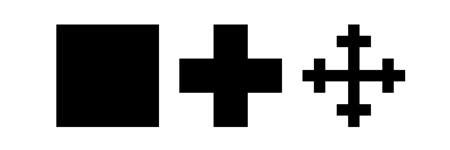</center>

Berechnen Sie fünf Iterationen des Vicsek-Fraktals und plotten Sie das Resultat!

In [ ]:
### BEGIN SOLUTION
# Ihre Lösung hier
### END SOLUTION

Übrigens: Wenn es Sie interessiert, die Hausdorff-Dimension lässt sich numerisch approximieren. Mehr erfahren Sie [hier.](https://en.wikipedia.org/wiki/Minkowski%E2%80%93Bouligand_dimension)

## Mandelbrot

Die Mandelbrot-Menge ist ein Fraktal und ein Kulturphänomen der 80er. Jeder Computernerd damals ließ aufwendig, meist über Nacht, die Mandelbrot-Menge berechnen, und das auf Computern, die heutigen Toastern unterlegen sind. Kinder der 80er sind oftmals nachhaltig traumatisiert, weil sie das stundenlange Mandelbrot-Gerechne davon abhielt, [Giana sisters](https://en.wikipedia.org/wiki/The_Great_Giana_Sisters) zu spielen. Wie auch immer. 

Was ist die Mandelbrot-Menge? Das ist die Menge aller komplexen Zahlen $c\in\mathbb C$, für die die Folge 

$$z_0=0,\quad z_{n+1}=z_n^2+c,\, n\geq 1$$

beschränkt bleibt. 

Offenbar müssen wir mit komplexen Zahlen rechnen. Die werden glücklicherweise direkt von python unterstützt. Eine komplexe Zahl definieren wir durch das Anhängen von <code>j</code> an eine Zahl. (Warum <code>j</code> und nicht <code>i</code>? Keine Ahnung, aber $j$ ist in den Ingenieurswissenschaften durchaus gebräuchlich.) Achtung: es muss immer eine Zahl direkt vor <code>j</code> stehen, dh, $i=\sqrt{-1}$ muss als <code>1j</code> geschrieben werden.  

In [ ]:
1j**2

Mit komplexen Zahlen kann ganz normal gerechnet werden. Verifizieren wir, dass $z^*=1+i$ eine Nullstelle von $f(z)=z^2-2z+2$ ist.

In [ ]:
def f(z):
    return z**2-2*z+2

f(1+1j)==0

Natürlich können wir uns Realteil, Imaginärteil und den Betrag einer komplexen Zahl ausgeben lassen. Wir nutzen dazu gleich die entsprechenden <code>numpy</code>-Funktionen, weil die auch auf *arrays* von komplexen Zahlen anwendbar sind. 

In [ ]:
z=1+42j
np.real(z),np.imag(z),np.absolute(z)

Wir versuchen nun heraus zu finden, welche der Punkte $c=u+vi$ mit $u\in [a,b],\, v\in[c,d]$ in der Mandelbrot-Menge liegen. Genau wie ob benutzen wir <code>np.meshgrid</code>, um ein 2-dimensionales array mit all den komplexen Zahlen, die wir austesten wollen, zu erhalten.

In [ ]:
reals=np.linspace(-2,1,500)  # die Realteile nehmen wir aus [-2,1]
imags=np.linspace(-1.5,1.5,500) # die Imaginärteile aus [-1.5,1.5]
rr,ii=np.meshgrid(reals,imags)

c=rr+ii*1j # dies sind unsere Testpunkte

Nun, die Iteration. Wir machen 1000 Schritte. Das erscheint exzessiv, geht aber fix.

In [ ]:
z=c
for _ in range(1000):
    z=z**2+c

absolute_values=np.absolute(z)

Ah, ein paar Warnung. Das war zu erwarten, denn die $z_n$ für Werte außerhalb der Menge wachsen unbeschränkt. Die Mandelbrot-Menge besteht aus all den Werten, für die die Iteration beschränkt bleibt. Wir überprüfen einfach, ob der Betrag von <code>z</code> endlich ist. Wir nutzen <code>np.where(some_condition,yes_value,no_value)</code>. Hier ist eine Demonstration:

In [ ]:
A=np.arange(12).reshape(4,3)
np.where(A % 2==0, A, -27)

Dort, wo die Bedingung erfüllt ist (hier: der Eintrag von <code>A</code> ist gerade), wird der <code>yes_value</code> hinein geschrieben. Dort wo die Bedingung falsch ist, erscheint der <code>no_value</code>.

Wir wenden das nun auf <code>absolute_values</code> an und plotten anschließend die Matrix.

In [ ]:
M=np.where(absolute_values<math.inf,1,0)

fig,ax=plt.subplots(figsize=(5,5))
ax.imshow(M,cmap='binary')
ax.axis('off')

Dies war nicht der effizienteste Weg, um die Menge zu berechnen. Wen's interessiert, [hier](https://en.wikipedia.org/wiki/Plotting_algorithms_for_the_Mandelbrot_set) gibt's mehr zu Berechnung der Mandelbrot-Menge.

Und noch etwas. Dadurch, dass wir <code>ax.imshow</code> verwenden, verlieren wir die sinnvolle Achsenbezeichnungen. Eine alternative ist <code>ax.contourf</code>, eine Methode mit der Funktionen $\mathbb R^2\to\mathbb R$ dargestellt werden können. Hier ist ein Beispiel.

In [ ]:
fig,ax=plt.subplots(figsize=(4,4))
ax.contourf(rr,ii,M,cmap='binary')